[Home](../README.md)

### Model Evaluation

This is a demonstration of evaluating a model.

Load the required dependencies.


In [15]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

#### Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [16]:
filename = 'my_saved_model_v1.sav'
model_C = pickle.load(open(filename, 'rb'))

In [17]:
mx_col = [
    'budget', 'release_quarter', 'rating', 'year', 'is_sequel', 'country', 'runtime',
    'genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Biography', 'genre_Comedy',
    'genre_Crime', 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Horror',
    'genre_Music', 'genre_Musical', 'genre_Mystery', 'genre_Romance', 'genre_Sci-Fi',
    'genre_Sport', 'genre_Thriller', 'genre_Western'
]
testing_data = pd.read_csv('testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['gross'])

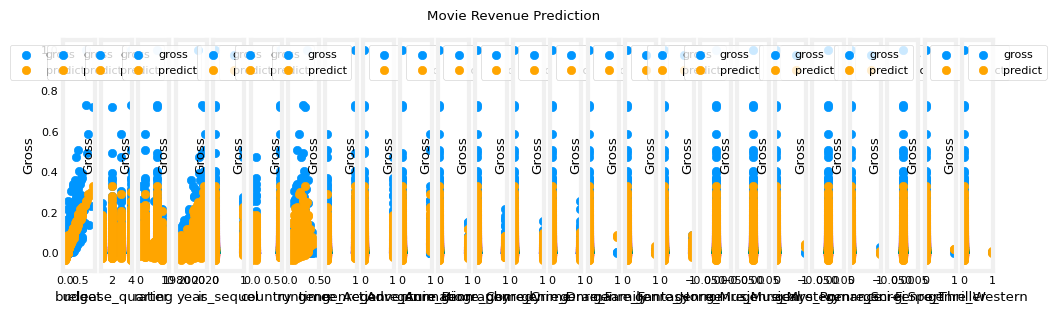

In [18]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'gross')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Gross"); ax[i].legend();
fig.suptitle("Movie Revenue Prediction")
plt.show()

In [19]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.5495349660203086


In [ ]:
#manual calculation of cost
print(model_C.predict([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]))

ValueError: Expected 2D array, got 1D array instead:
array=[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [35]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Cost'] = my_test - model_C.predict(mx_test).round(2)

table = pd.DataFrame(data)
print(table)

      genre_Action  genre_Adventure  genre_Animation  genre_Biography  \
0            False            False             True            False   
1            False            False             True            False   
2             True            False            False            False   
3            False            False            False            False   
4            False            False            False            False   
...            ...              ...              ...              ...   
1875         False            False            False            False   
1876         False            False            False            False   
1877         False            False            False            False   
1878         False             True            False            False   
1879         False            False            False             True   

      genre_Comedy  genre_Crime  genre_Drama  genre_Family  genre_Fantasy  \
0            False        False        False  

In [36]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: 0.025208424937936756
Coefficient: [ 0.02359497  0.00813438  0.06214168 -0.00830554 -0.00900408 -0.01199248
 -0.01086292  0.08158891 -0.00868322 -0.00725158 -0.02516989 -0.0244298
  0.01707805 -0.0169376  -0.01055999 -0.02483356 -0.00990855 -0.02459878]
